In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Gupta Ji\\Untitled Folder 2'

In [3]:
os.chdir("C:\\Users\\Gupta Ji\\Downloads")

In [4]:
insurance = pd.read_csv("expenses.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


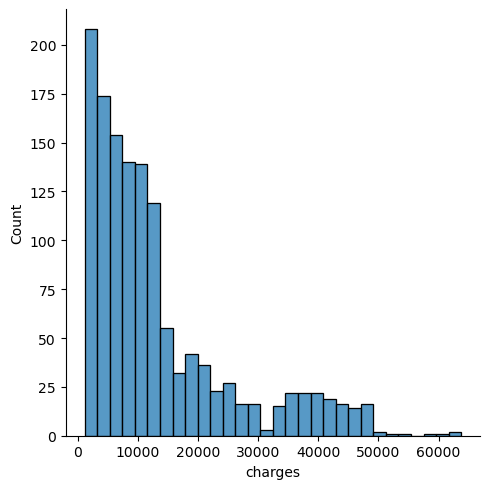

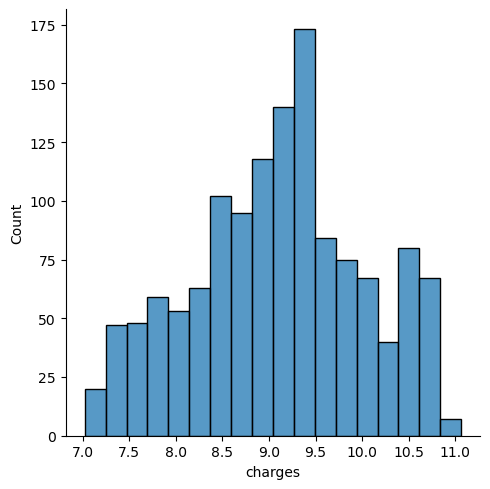

In [9]:
skewed = sns.displot(insurance['charges'])
skewed

log_trans = sns.displot(np.log(insurance['charges']))
log_trans

<AxesSubplot:xlabel='region', ylabel='charges'>

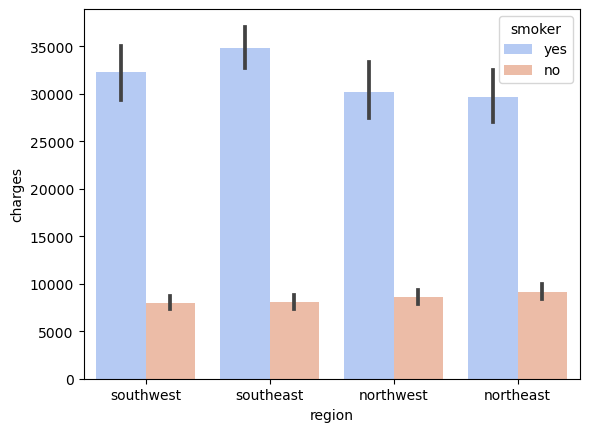

In [10]:
sns.barplot(x='region', y='charges',data=insurance, hue='smoker', palette='coolwarm')

<AxesSubplot:xlabel='region', ylabel='charges'>

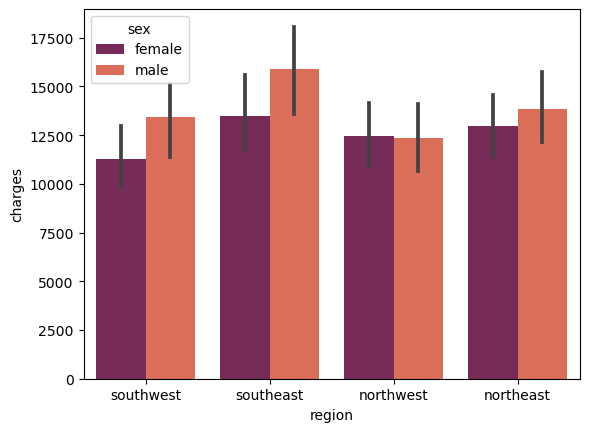

In [11]:
sns.barplot(x='region', y='charges', data=insurance, hue='sex', palette='rocket')

<AxesSubplot:xlabel='region', ylabel='charges'>

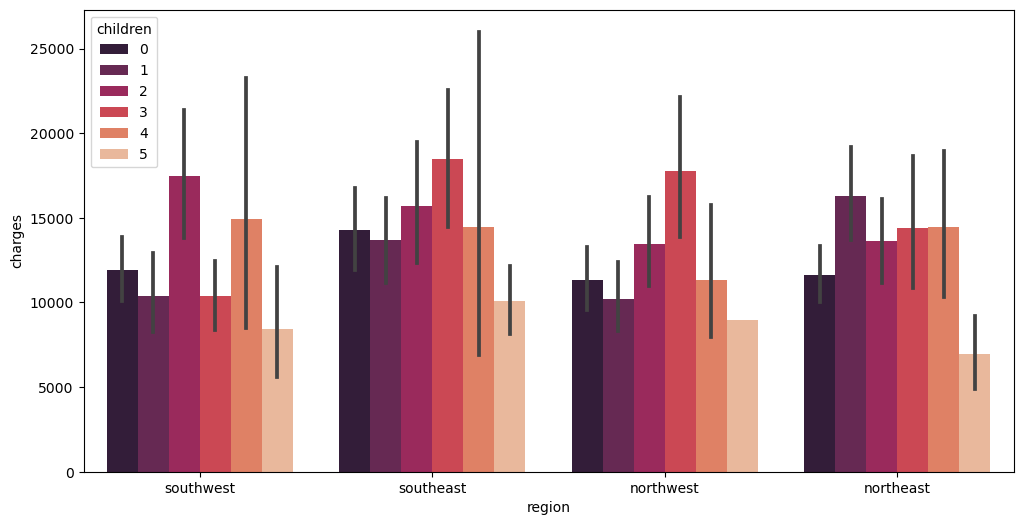

In [12]:
# we check the charges by region by the children available
plt.figure(figsize=(12,6))
sns.barplot(x='region',y='charges',data=insurance, hue='children',palette='rocket')

<AxesSubplot:xlabel='children', ylabel='charges'>

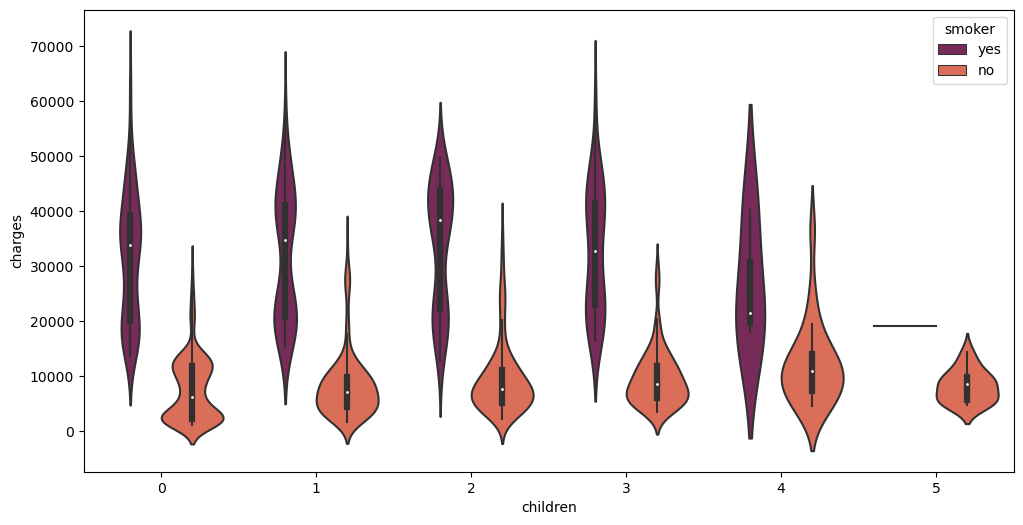

In [13]:
plt.figure(figsize=(12,6))
sns.violinplot(x='children',y='charges',data=insurance, hue='smoker',palette='rocket')

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance.sex.drop_duplicates())
insurance.sex = label.transform(insurance.sex)
label.fit(insurance.smoker.drop_duplicates())
insurance.smoker = label.transform(insurance.smoker)
label.fit(insurance.region.drop_duplicates())
insurance.region = label.transform(insurance.region)

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

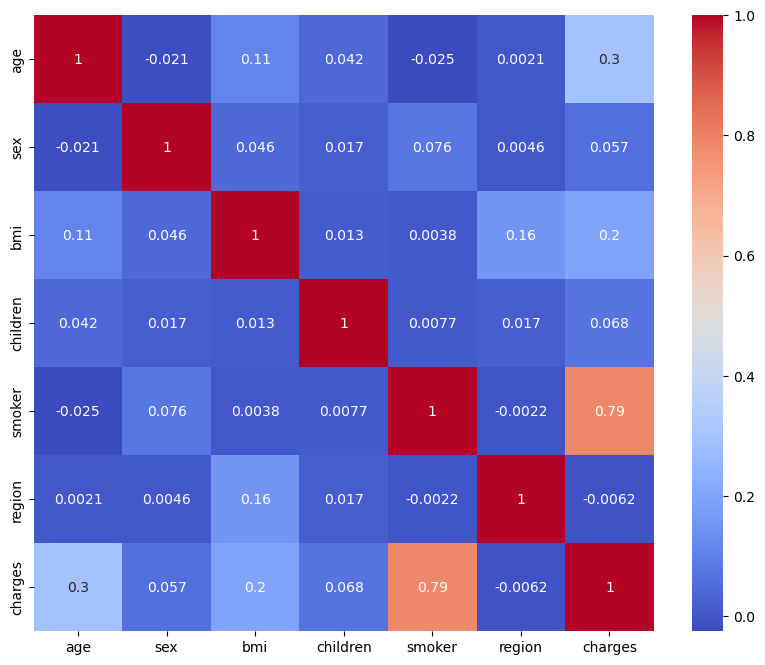

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(),cmap='coolwarm',annot=True)

In [17]:
#we split our model
x=insurance.drop(['charges'],axis=1)
y=insurance['charges']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lm.predict(x_test)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

0.7998747145449959